# 1a. The Passive and Active Suspension System (with Ideal Actuation)

In this project, the models are based on the quarter vehicle dynamic model of the car. And the dynamic equations are shown below

## The Dynamic Equation for the Passive System:

$$
\ddot{Z_s} = \frac{1}{M_s}\left[ b_{s}(\dot{Z_u} - \dot{Z_s}) - K_{s}(Z_s - Z_u) \right]
$$

$$
\ddot{Z_u} = \frac{1}{M_u}\left[ b_{s}(\dot{Z_s} - \dot{Z_u}) + K_{s}(Z_s - Z_u) -b_{t}(\dot{Z_u}-\dot{Z_r})-K_{t}(Z_u - Z_r) \right]
$$

## The Dynamic Equation for the Active System:

$$
\ddot{Z_s} = \frac{1}{M_s}\left[ b_{s}(\dot{Z_u} - \dot{Z_s}) - K_{s}(Z_s - Z_u) + u \right]
$$

$$
\ddot{Z_u} = \frac{1}{M_u}\left[ b_{s}(\dot{Z_s} - \dot{Z_u}) + K_{s}(Z_s - Z_u) -b_{t}(\dot{Z_u}-\dot{Z_r})-K_{t}(Z_u - Z_r) - u \right]
$$

Where,
$M_s$, $M_u$, $K_s$, $b_s$, $K_t$,and $b_t$ are the sprung element mass, unsprung element mass, spring stiffness, damper coefficient, tire stiffness, and tire's damping coefficient respectively. $u$ is the control force or control input. $Z_s$ and $Z_u$ are the displacement of the sprung and unsprung mass. 

The sprung mass of the vehicle includes all systems located above the suspension system, while the unsprung mass includes all systems below the suspension system.



In [1]:
import matplotlib.pyplot as plt
import pycollimator as C
import math
%matplotlib widget

#Set up a connect to the collimator API
token = "507d5f58-59b6-4328-b600-xxx" #copy your token here - I redacted the token for security purposes xDxD
project_uuid = "858d5ed1-16b2-4563-9e5e-8623755fe414" #copy your project uuid here
C.set_auth_token(token, project_uuid)

#View the models within the project file
print(C.list_models())

#load the models
passive = C.load_model('Passive Suspension Control')
active = C.load_model('Active Suspension Control')

#Run the Simulations and shows logs
sim_passive = C.run_simulation(passive)
sim_passive.show_logs()
sim_active = C.run_simulation(active)
sim_active.show_logs()

#Transform the simulation results into a pandas dataframe
data_pas = sim_passive.results.to_pandas()
data_act = sim_active.results.to_pandas()


# plt.figure()
# plt.title("Test")

[<Model name='Passive Suspension Control'>, <Model name='bump_signal'>, <Model name='Active Suspension Control'>, <Model name='Hydraulic Actuator Anti-Windup'>, <Model name='Hydraulic Actuator'>, <Model name='test_hydraulic_controller'>, <Model name='Active Suspension Hydraulic Actuator'>]

2023-09-04 18:57:56.989 INF model compiled successfully simulation_uuid=a30b4d0c-60a0-4c0e-945a-b13399892272 time=0.250154972076416
1970-01-01 14:02:23.841 INF starting model binary 🚀
1970-01-01 14:02:24.009 INF simulation completed successfully 🎉 total_time=0.167632 simulation_time=0.035354

2023-09-04 18:58:04.003 INF model compiled successfully simulation_uuid=56ea83af-4167-4cb3-ad56-e17d8428b1c2 time=0.2609281539916992
1970-01-01 14:02:30.850 INF starting model binary 🚀
1970-01-01 14:02:31.093 INF simulation completed successfully 🎉 total_time=0.242481 simulation_time=0.086964


In [2]:
#View the first few rows of the dataframes
print(data_pas.head())
print()
print(data_act.head())

        Adder_0.out_0  Adder_1.out_0  Gain_0.out_0  Clock_0.out_0  \
time                                                                
0.0000            0.0            0.0           0.0         0.0000   
0.0001            0.0            0.0           0.0         0.0001   
0.0011            0.0            0.0           0.0         0.0011   
0.0111            0.0            0.0           0.0         0.0111   
0.1000            0.0            0.0           0.0         0.1000   

        Adder_2.out_0  Adder_3.out_0  Kt.out_0  bs.out_0  Derivative_0.out_0  \
time                                                                           
0.0000            0.0            0.0       0.0       0.0                 0.0   
0.0001            0.0            0.0       0.0       0.0                 0.0   
0.0011            0.0            0.0       0.0       0.0                 0.0   
0.0111            0.0            0.0       0.0       0.0                 0.0   
0.1000            0.0            0.0

# 1b. Comparison Plots between the Passive and the Ideal Actuated Active System

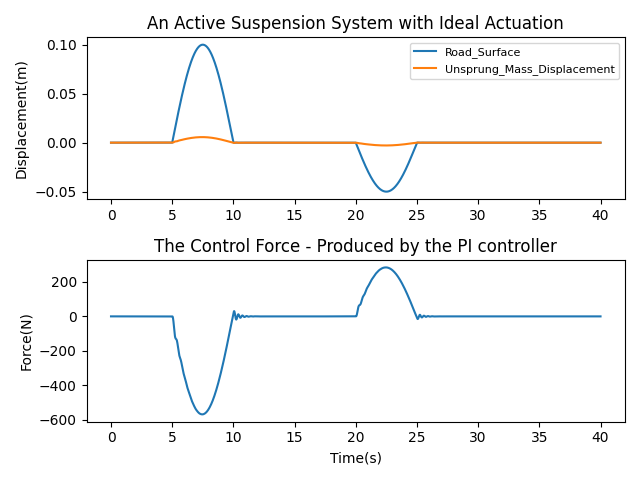

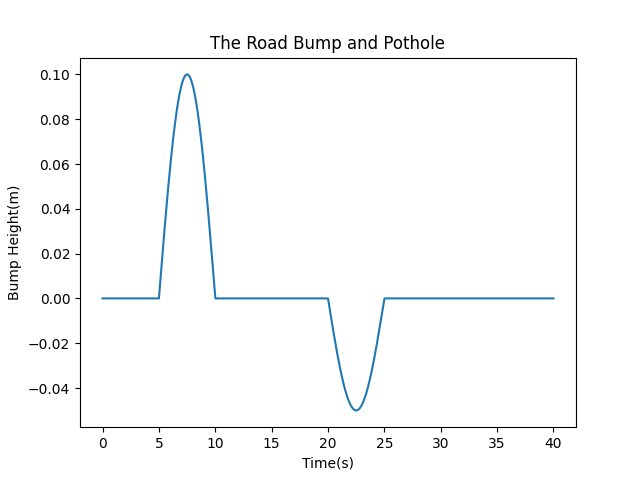

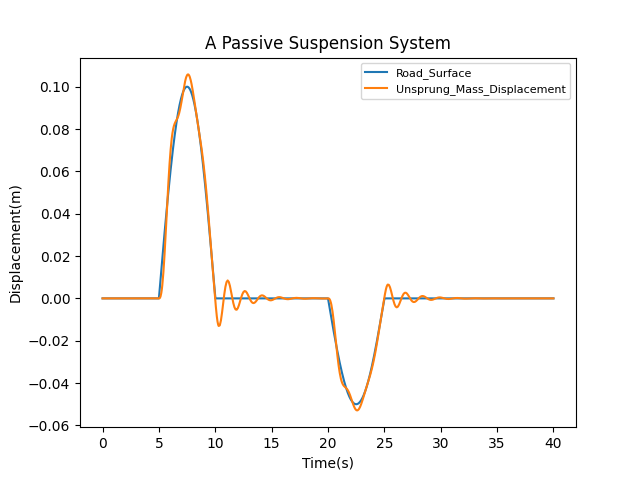

In [3]:
#Plot the results

#Plot the road bump and potholes
plt.figure(1)
plt.title('The Road Bump and Pothole')
plt.plot(data_pas['Zr_Road_Input.out_0'])
plt.ylabel('Bump Height(m)')
plt.xlabel('Time(s)')

#Plot the Road Bump and the Car's displacement for the passive suspension system
plt.figure(2)
plt.title("A Passive Suspension System")
plt.plot(data_pas['Zr_Road_Input.out_0'])
plt.plot(data_pas['integrator_Zs.out_0'] )
plt.ylabel('Displacement(m)')
plt.xlabel('Time(s)')
plt.legend(['Road_Surface','Unsprung_Mass_Displacement'],loc = 'upper right',fontsize=8)

#Plot the Road Bump and the Car's displacement and the control force for the active suspension system
# plt.figure(3)
# Create a figure with two subplots
fig, axs = plt.subplots(2, 1)
# Plot the data on the subplots and set the titles
axs[0].plot(data_act['Zr_Road_Input.out_0'])
axs[0].plot(data_act['integrator_Zs.out_0'])
axs[0].set_title("An Active Suspension System with Ideal Actuation")
axs[0].set_ylabel('Displacement(m)')
axs[0].legend(['Road_Surface','Unsprung_Mass_Displacement'],loc = 'upper right',fontsize=8)

axs[1].plot(data_act['Control_Force.out_0'])
axs[1].set_title("The Control Force - Produced by the PI controller")
axs[1].set_ylabel('Force(N)')
axs[1].set_xlabel('Time(s)')

# Adjust the layout of the subplots
fig.tight_layout()

# Show the plots
plt.show()




# 2a. The Active Suspension System with a non-ideal Actuator (Hydraulic Actuator)

The equations describing the dynamics of the hydrualic actuator are described below:

a. The displacement ($x_{sv}$) of the servo valve under the influence of **an input voltage**.
$$
x_{sv} = \frac{1}{\tau}\int\left( k_{sv}u(t) - x_{sv}\right)dt
$$

b. The flow of liquid ($Q$) through the valve.
$$
Q = \frac{\sigma_3}{\sigma_1}x_{sv}\sqrt{ P_s - sgn(x_{sv})\Delta P}
$$

c. The change in pressure ($\Delta P$).
$$
\Delta P = \sigma_1\int \left( Q - \frac{\sigma_2}{\sigma_1}\Delta P - S_p\dot{x}_s\right)dt
$$

d. **The output force** generated from the actuator.
$$
F_A = S_p\Delta P
$$

Where, $x_{sv}$ is the servo displacement, $\tau$ is the time constant, $k_{sv}$ is the servo valve gain, $u(t)$ is the input voltage, $Q$ is the hydraulic fluid flow rate; $sigma_1, sigma_2, sigma_3$ are the actuator coefficients; $P_s$ is the supply pressure, $\Delta P$ is the change in pressure, $S_p$ is the piston's cross-sectional area.


In [4]:
# Load the model
hydraulic = C.load_model('Hydraulic Actuator')

#Run the Simulations and shows logs
sim_hydraulic = C.run_simulation(hydraulic)
sim_hydraulic.show_logs()

#Transform the simulation results into a pandas dataframe
data_hyd = sim_hydraulic.results.to_pandas()

#View the first few rows of the dataframes
print(data_hyd.head())


2023-09-04 18:58:24.333 INF model compiled successfully simulation_uuid=7b374262-84f9-49fb-a975-a4b97387b8ee time=0.36348915100097656
1970-01-01 14:02:51.181 INF starting model binary 🚀
1970-01-01 14:03:16.148 INF simulation completed successfully 🎉 total_time=24.967027 simulation_time=24.791534
      bt.out_0  Adder_5.out_0  Zs_Ref.out_0  Ks.out_0  integrator_Zs.out_0  \
time                                                                         
0.00       0.0            0.0           0.0       0.0                  0.0   
0.01       0.0            0.0           0.0       0.0                  0.0   
0.10       0.0            0.0           0.0       0.0                  0.0   
0.20       0.0            0.0           0.0       0.0                  0.0   
0.30       0.0            0.0           0.0       0.0                  0.0   

      Gain_4.out_0  Adder_6.out_0  Integrator_Zu.out_0  Zr_Road_Input.out_0  \
time                                                                        

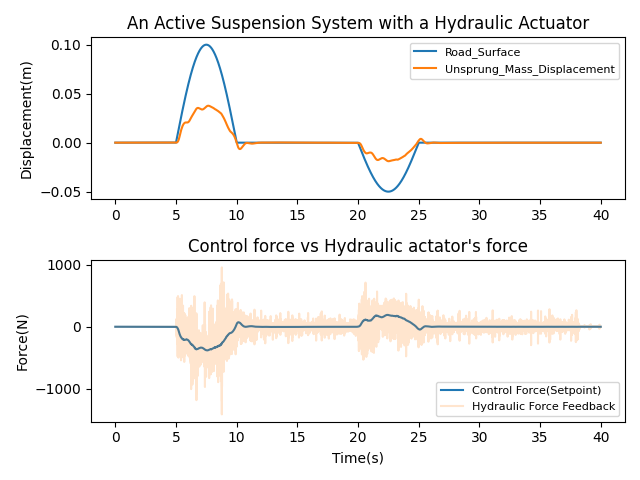

In [5]:
#1 Active suspension with a hydraulic actuator -road surface vs displacement
#2 Control force vs Hydraulic actator's force
# Create a figure with two subplots
fig, axs = plt.subplots(2, 1)
# Plot the data on the subplots and set the titles
axs[0].plot(data_hyd['Zr_Road_Input.out_0'])
axs[0].plot(data_hyd['integrator_Zs.out_0'])
axs[0].set_title("An Active Suspension System with a Hydraulic Actuator")
axs[0].set_ylabel('Displacement(m)')
axs[0].legend(['Road_Surface','Unsprung_Mass_Displacement'],loc = 'upper right',fontsize=8)

axs[1].plot(data_hyd['PID_Controller.Force_Limit.out_0'])
axs[1].plot(data_hyd['Actuator.Force_Output.out_0'], alpha = 0.2)
axs[1].set_title("Control force vs Hydraulic actator's force")
axs[1].set_ylabel('Force(N)')
axs[1].set_xlabel('Time(s)')
axs[1].legend(['Control Force(Setpoint)','Hydraulic Force Feedback'],loc = 'lower right',fontsize=8)

# Adjust the layout of the subplots
fig.tight_layout()

# Show the plots
plt.show()

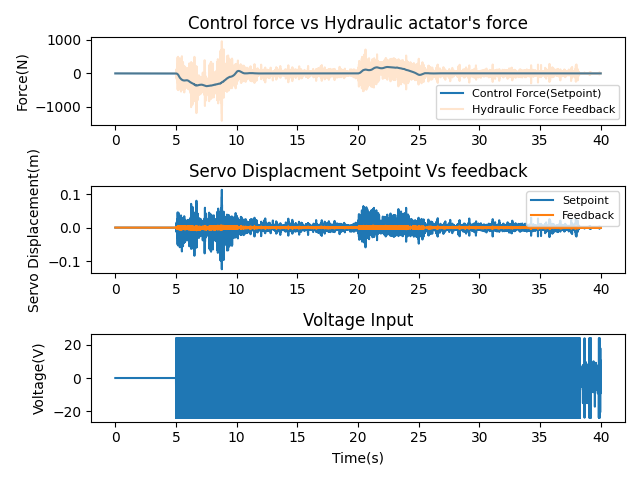

In [6]:
#Internal dynamics of the hydrualic actuator
#1. Control force vs Hydraulic actuator's force
#2. servo displacment setpoint & feedback
#3. voltage input

# Create a figure with three subplots
fig, axs = plt.subplots(3, 1)
# Plot the data on the subplots and set the titles
axs[0].plot(data_hyd['PID_Controller.Force_Limit.out_0'])
axs[0].plot(data_hyd['Actuator.Force_Output.out_0'], alpha = 0.2)
axs[0].set_title("Control force vs Hydraulic actator's force")
axs[0].set_ylabel('Force(N)')
axs[0].legend(['Control Force(Setpoint)','Hydraulic Force Feedback'],loc = 'lower right',fontsize=8)

axs[1].plot(data_hyd['Actuator.Xsv_ref.out_0'])
axs[1].plot(data_hyd['Actuator.Gain_0.out_0'])
axs[1].set_title("Servo Displacment Setpoint Vs feedback")
axs[1].set_ylabel('Servo Displacement(m)')
axs[1].legend(['Setpoint','Feedback'],loc = 'upper right',fontsize=8)


axs[2].plot(data_hyd['Actuator.Voltage_Limit.out_0'])
axs[2].set_title("Voltage Input")
axs[2].set_ylabel('Voltage(V)')
axs[2].set_xlabel('Time(s)')


# Adjust the layout of the subplots
fig.tight_layout()

# Show the plots
plt.show()


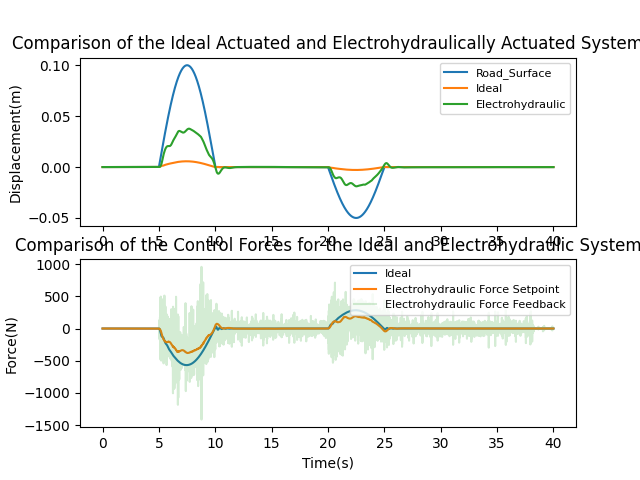

In [7]:
# Create a figure with three subplots
fig, axs = plt.subplots(2, 1)
axs[0].plot(data_hyd['Zr_Road_Input.out_0'])
axs[0].plot(data_act['integrator_Zs.out_0'])
axs[0].plot(data_hyd['integrator_Zs.out_0'])
axs[0].set_title("Comparison of the Ideal Actuated and Electrohydraulically Actuated System")
axs[0].set_ylabel('Displacement(m)')
axs[0].legend(['Road_Surface','Ideal', 'Electrohydraulic'],loc = 'upper right',fontsize=8)


axs[1].plot(data_act['Control_Force.out_0'])
axs[1].plot(data_hyd['PID_Controller.Force_Limit.out_0'])
axs[1].plot(data_hyd['Actuator.Force_Output.out_0'], alpha = 0.2)
axs[1].set_title("Comparison of the Control Forces for the Ideal and Electrohydraulic System")
axs[1].set_ylabel('Force(N)')
axs[1].set_xlabel('Time(s)')
axs[1].legend(['Ideal','Electrohydraulic Force Setpoint', 'Electrohydraulic Force Feedback'],loc = 'upper right',fontsize=8)